In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Estimating Population Proportions

Preparing data

In [17]:
data_1 = (["Ford"]*100000) + (["Toyota"]*50000) +\
                   (["Peugot"]*50000) + (["Renault"]*25000) +\
                   (["Chevrolet"]*25000)

The population proportions

for brand in set(data_1):
    print("The car brand "+brand+ f" represents {data_1.count(brand)*100/len(data_1)}"+" %")

The sample data

In [19]:
np.random.seed(40)
data_1_sample = list(np.random.choice(a = data_1 , size = 500))

In [20]:
n = len(data_1_sample)

The sample proportions

In [21]:
for brand in set(data_1_sample):
    print("The car brand "+brand+ f" represent {data_1_sample.count(brand)*100/n} %")

The car brand Toyota represent 19.6 %
The car brand Renault represent 10.0 %
The car brand Peugot represent 19.4 %
The car brand Ford represent 41.2 %
The car brand Chevrolet represent 9.8 %


Estimating the proportion of Toyota cars

In [23]:
confidence_level = 0.95

In [24]:
alpha = 1 - confidence_level

In [25]:
point_estimate = data_1_sample.count("Toyota") / n

In [26]:
  critical_z_1 = stats.norm.ppf(confidence_level + alpha/2)
# critical_z_1 = stats.norm.ppf(1 - alpha/2)

In [27]:
standard_error_1 = math.sqrt( (point_estimate) * (1-point_estimate)/n )

In [28]:
margin_error_1 = critical_z_1 * standard_error_1

In [29]:
lower_bound_1 = point_estimate - margin_error_1
upper_bound_1 = point_estimate + margin_error_1

In [30]:
print(f"The estimation of Toyota cars proportion is between {lower_bound_1*100:.4} % and {upper_bound_1*100:.4} %")

The estimation of Toyota cars proportion is between 16.12 % and 23.08 %


Method for returning the confidence interval

In [31]:
stats.norm.interval(confidence = 0.95, loc = point_estimate,scale=standard_error_1)

(0.16120481508023668, 0.23079518491976334)

# Estimating Population Mean

Generating normal distributed data

In [32]:
data_2 = np.random.normal( 170 , 7 , 200000 )

Sample data

In [33]:
data_2_sample = np.random.choice(a = data_2 , size = 500)

Estimating the population mean (With the Z-Score)

In [56]:
n2 = len(data_2_sample)

In [57]:
sample_mean_2 = data_2_sample.mean()

In [58]:
population_std_2  = data_2.std()

In [59]:
standard_error_2 = population_std_2 / math.sqrt(n2)

In [60]:
critical_z_2 = stats.norm.ppf( confidence_level + alpha/2 )

In [61]:
stats.norm.interval(confidence=confidence_level, loc=sample_mean_2 , scale=standard_error_2)

(169.58921463661358, 170.81668894555878)

Estimating the population mean (With the T-Score)

In [65]:
stats.t.interval(
    confidence= confidence_level,
    loc= sample_mean_2,
    scale= (data_2_sample.std(ddof=1)/math.sqrt(n2)),
    df= n2-1)

(169.62281512431716, 170.7830884578552)

# Central Limit Theorem

Generating non-normal distributed data

In [3]:
np.random.seed(30)
data_3 = np.random.randint(150,195,size=200000)

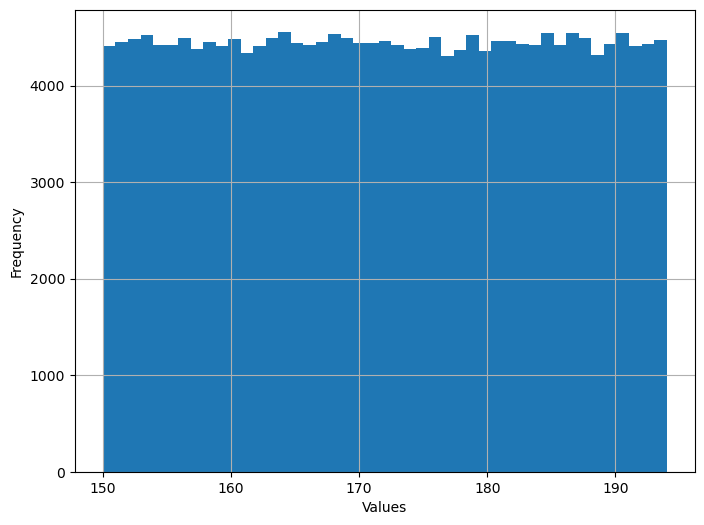

In [4]:
plt.figure(figsize=(8, 6))
plt.hist(data_3, bins=45)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Creating normal distributed data via central limit theorem

In [66]:
np.random.seed(15)

point_estimates = []

for x in range(500):
    sample = np.random.choice(a = data_3, size=1000)
    point_estimates.append(np.mean(sample))

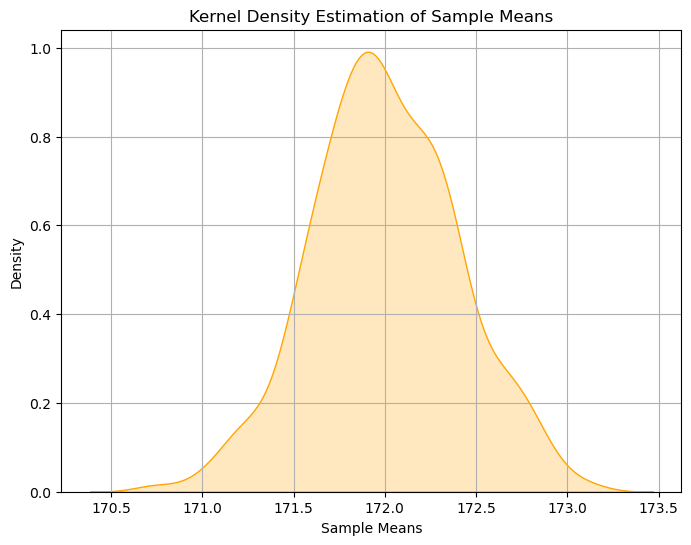

In [67]:
plt.figure(figsize=(8, 6))
sns.kdeplot(point_estimates, fill=True, color='orange')
plt.title('Kernel Density Estimation of Sample Means')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.grid(True)
plt.show()